In [1]:
import pandas as pd

data = pd.read_excel('CustomerDataSet.xls')
data

,Customer ID,ItemsBought,ItemsReturned,ZipCode,Product
0,4,45,10,2,1365
1,5,42,18,5,2764
2,6,50,0,1,1343
3,8,13,12,4,2435
4,9,10,7,3,2435
5,10,34,17,6,2896
6,11,40,20,8,2869
7,12,40,8,2,1236
8,14,9,9,8,2435
9,15,36,7,2,1764


In [3]:
data2 = data.copy()
# 거리계산을 위해 정규화 전처리 실행
from sklearn.preprocessing import MinMaxScaler
data2[['ItemsBought','ItemsReturned']] = MinMaxScaler().fit_transform(data2[['ItemsBought','ItemsReturned']])
data2

,Customer ID,ItemsBought,ItemsReturned,ZipCode,Product
0,4,0.878049,0.454545,2,1365
1,5,0.804878,0.818182,5,2764
2,6,1.000000,0.000000,1,1343
3,8,0.097561,0.545455,4,2435
4,9,0.024390,0.318182,3,2435
5,10,0.609756,0.772727,6,2896
6,11,0.756098,0.909091,8,2869
7,12,0.756098,0.363636,2,1236
8,14,0.000000,0.409091,8,2435
9,15,0.658537,0.318182,2,1764


C:\Anaconda3\envs\KB\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda3\envs\KB\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda3\envs\KB\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda3\envs\KB\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when

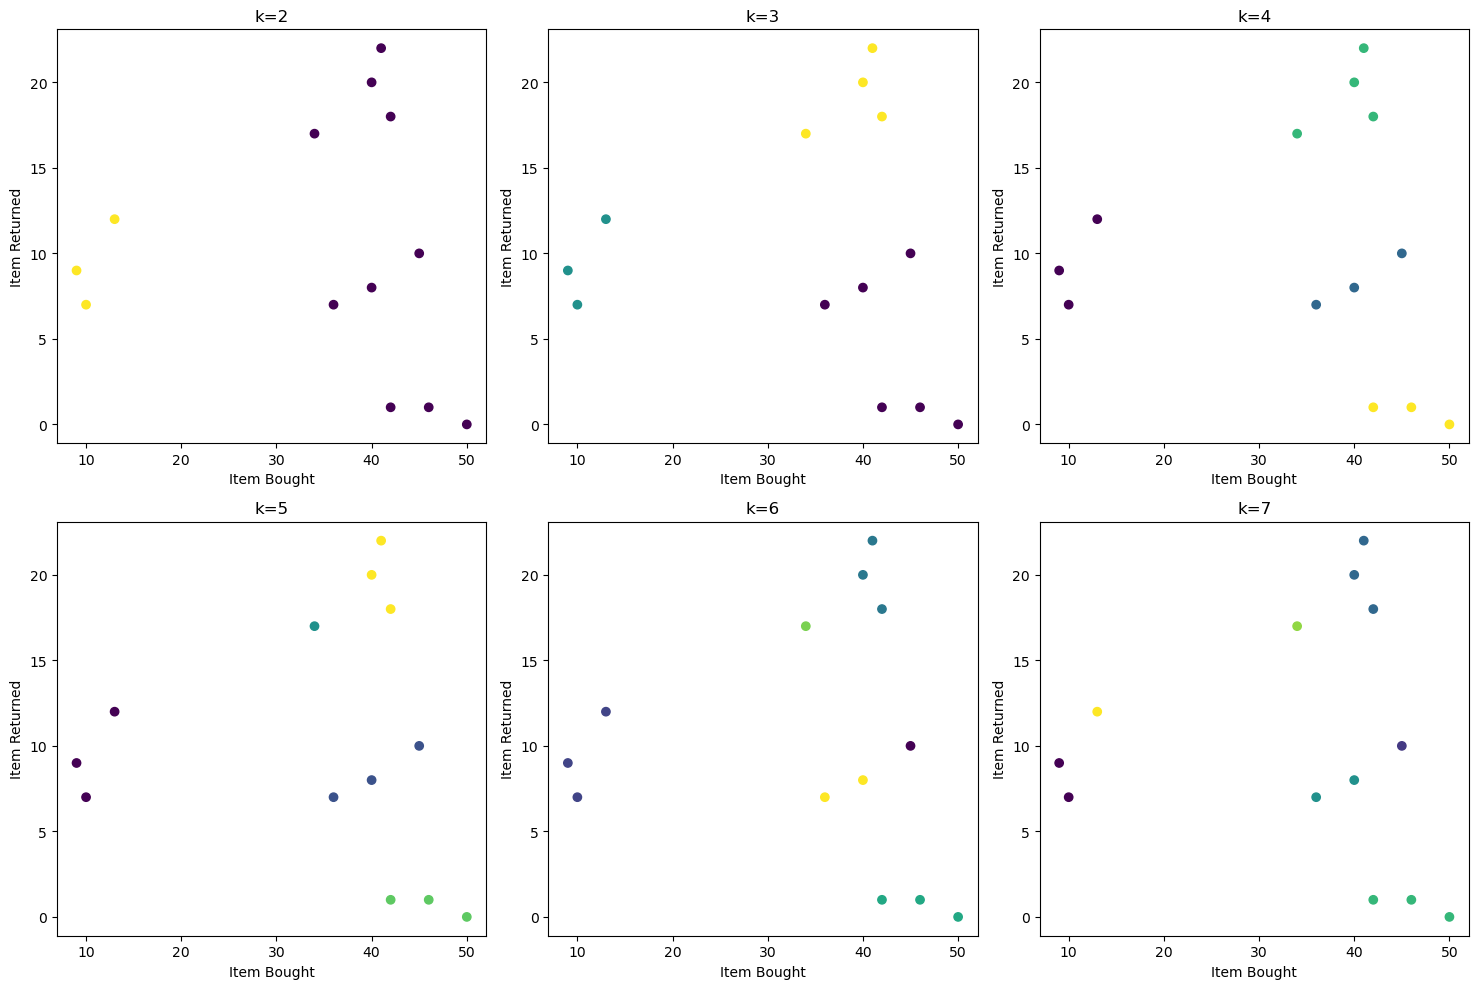

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
# 군집분석
from sklearn.cluster import KMeans
# 여러가지 군집 갯수 테스트
for k in range(2,8):
    model = KMeans(n_clusters=k)
    pred = model.fit_predict(data2[["ItemsBought","ItemsReturned"]])
    # 2행 3열 그래프
    plt.subplot(2,3,k-1) #그래프 순번은 1부터 시작
    plt.tight_layout()
    plt.title(f'k={k}')
    plt.xlabel('Item Bought')
    plt.ylabel('Item Returned')
    plt.scatter( 
        data["ItemsBought"], 
        data["ItemsReturned"],
        c = pred # color : 같은 값끼리 같은 색을 가짐
    ) 

C:\Anaconda3\envs\KB\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


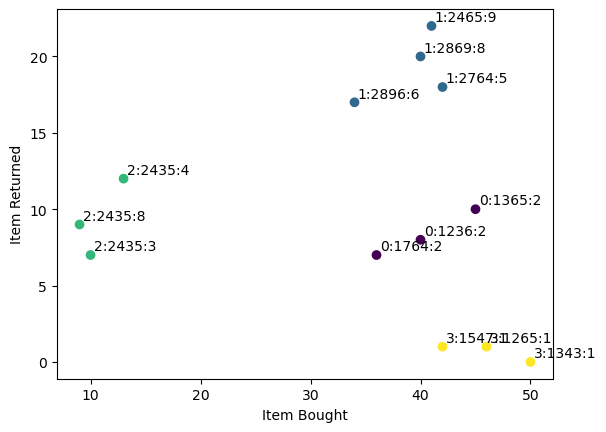

In [24]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4)
pred = model.fit_predict(data2[["ItemsBought","ItemsReturned"]])
# 2행 3열 그래프
plt.tight_layout()
plt.xlabel('Item Bought')
plt.ylabel('Item Returned')
# 군집별 색깔 지정
plt.scatter( 
    data["ItemsBought"], 
    data["ItemsReturned"],
    c = pred # color : 같은 값끼리 같은 색을 가짐
) 
for index,c_id,bought,returned,zipcode,product in data.itertuples():
    plt.annotate(f'{pred[index]}:{product}:{zipcode}',(bought+.3,returned+.3))

In [15]:
list(data2.itertuples())

[Pandas(Index=0, _1=4, ItemsBought=0.878048780487805, ItemsReturned=0.4545454545454546, ZipCode=2, Product=1365),
 Pandas(Index=1, _1=5, ItemsBought=0.8048780487804879, ItemsReturned=0.8181818181818182, ZipCode=5, Product=2764),
 Pandas(Index=2, _1=6, ItemsBought=1.0, ItemsReturned=0.0, ZipCode=1, Product=1343),
 Pandas(Index=3, _1=8, ItemsBought=0.0975609756097561, ItemsReturned=0.5454545454545454, ZipCode=4, Product=2435),
 Pandas(Index=4, _1=9, ItemsBought=0.02439024390243902, ItemsReturned=0.3181818181818182, ZipCode=3, Product=2435),
 Pandas(Index=5, _1=10, ItemsBought=0.6097560975609757, ItemsReturned=0.7727272727272727, ZipCode=6, Product=2896),
 Pandas(Index=6, _1=11, ItemsBought=0.7560975609756098, ItemsReturned=0.9090909090909092, ZipCode=8, Product=2869),
 Pandas(Index=7, _1=12, ItemsBought=0.7560975609756098, ItemsReturned=0.36363636363636365, ZipCode=2, Product=1236),
 Pandas(Index=8, _1=14, ItemsBought=0.0, ItemsReturned=0.4090909090909091, ZipCode=8, Product=2435),
 Pand